In [93]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline
sns.set_color_codes()

In [94]:
sns.set_color_codes()

## Comparing GDP

### A. Total GDP (constant, mkt) data 

* Construct xarray **<span style="color:white; background:maroon;">STARTED</span>**

* Compare/plot total GDP (real, mkt) timeseries **<span style="color:white; background:maroon;">STARTED</span>**    
    - UN national accounts
    - IMF (IFS vs WEO)
    - WB    
    
---

* Compare/plot major countries 
    * mortality countries
        
    Brazil  1997-2009
    Chile 1997-2012
    EU (different spatial scale than others - NUTS2)
    France 1998-2012
    India 1957-2001
    Japan 1975-2012
    Mexico 1990-2012
    USA 1968-2013

    * Question - is discrepancy from the top 10 or others? (get a factor of gdp_top_10/gdp_total

* Compare PWT values (rgpdna, rgpde, rgpdo)
* Compare with GDP (PPP)
* Compare with La Porta for Mortality countries




### Z. Convenience functions

In [95]:
def add_iso_column(_df, _country_name_col):
    # uses iso_map (global dict)
    _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

def set_col_as_index(_df, _col_name):
    return _df.set_index(_col_name)

# # country specific
# def get_row_by_country_name(_df, country_name):
#     # Get country by name
#     return _df[_df['country_name'] == country_name]

# lets simplify
def label_axes(_ax, _x_label, _y_label, _title):
    _ax.set_xlabel(_x_label, fontsize=14)
    _ax.set_ylabel(_y_label, fontsize=14)
    _ax.set_title(_title, fontsize=14)

In [96]:
def drop_non_years(_df):
    def _is_year(_y):
        try:
            float(_y)
            return True
        except ValueError:
            return False
    return _df[[x for x in _df.columns if _is_year(x)]] 

In [97]:
# update equivalence unit (make it bill or 100s of mil)
def make_df_single_country(_iso):
    '''
    Abstracting out what was done for Brazil. Need to test to see if this works
    
    _iso: String
       iso country code in three letters ex. CHN for China and BRA for Brazil
        
    '''
    assert cpwt.shape == cwb.shape == cimf.shape == cun.shape
    
    #pwt
    _pwt = df_pwt.loc[_iso][31:] * 10**6
    
    #wb
    _wb = df_wb.loc[_iso][21:56]
    
    # un
    _un = df_un.loc[_iso][31:66] * 10**3
    
    # imf
    _imf = df_imf.loc[_iso][1:36] * 10**6

    return pd.DataFrame({'pwt': _pwt, 
                   'wb': _wb, 
                   'un': _un,
                   'imf': _imf})

### Y. Download data (PWT, IMF, WB) - real market

In [98]:
dir_path = os.environ['ZERG']

pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'
imf = dir_path + 'data/imf/WEOOct2017all.xls'

### A. Total GDP, real mkt

### Data prepping:

In [99]:
# 1.WEO data (4 countries only for comparison with IFS)

In [100]:
imf_sub = dir_path + 'data/imf/weo_oct_2017_sub.xls'

In [101]:
df_imf_sub = pd.read_excel(imf_sub)
df_imf_real_mkt = df_imf_sub[df_imf_sub['Type']=='gdp_real_mkt']

In [102]:
df_imf_mod = drop_non_years(set_col_as_index(df_imf_real_mkt, 'ISO'))
df_imf_mod.columns = df_imf_mod.columns.to_series().apply(lambda x: int(x))

In [103]:
df_imf_mod

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ISO,,,,,,,,,,,,,,,,,,,,,
BRA,697.792,761.919,728.395,732.736,707.823,745.387,804.28,864.955,896.102,898.468,...,1740.156363,1792.448062,1801.48,1802.450000,1803.450000,1804.470000,1805.490000,1806.510000,1807.530000,1808.550000
CHN,428.2,462.07,485.64,529.35,586.52,675.67,766.88,835.14,932.85,1038.26,...,9705.410000,10462.430000,11226.19,12000.790000,12804.850000,13671.090000,14559.710000,15476.980000,16436.550000,17422.740000
IND,253.123,266.49,282.496,292.315,313.622,325.606,342.713,359.085,373.322,409.266,...,1827.284322,1943.974699,2089.87,2238.397061,2388.750191,2564.729418,2764.829607,2984.135892,3225.821058,3489.177089
USA,7317.35,7299.5,7488.85,7345.74,7686.06,8244,8593.38,8895.17,9203.13,9590.03,...,17375.452570,17666.838910,18120.70,18121.714850,18122.736660,18123.760070,18124.779140,18125.796830,18126.813890,18127.830690


In [104]:
historical_years = [x for x in range(1980,2017)] # not forecasts
df_imf_hist = df_imf_mod[historical_years]

In [110]:
sns.set_color_codes()

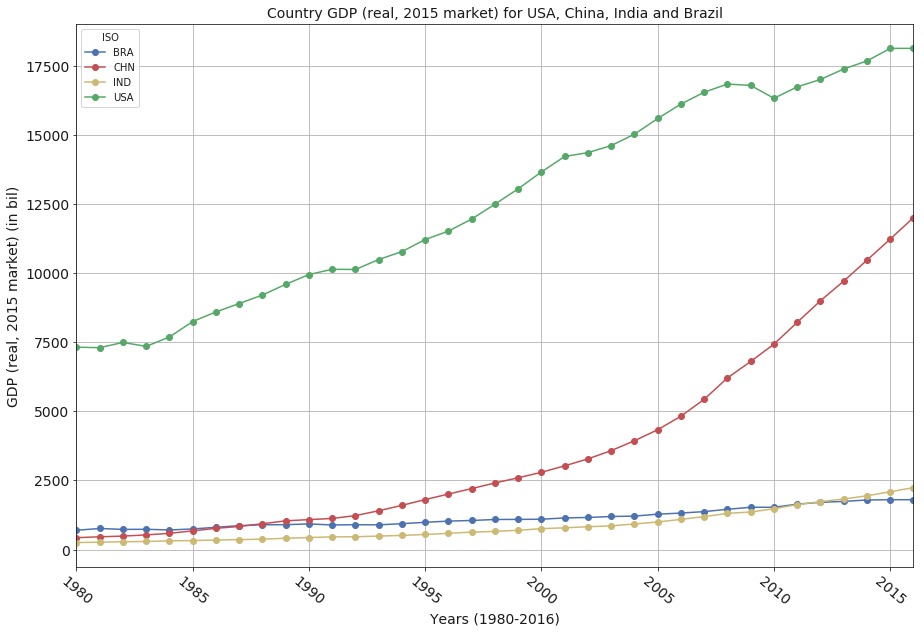

In [112]:
plt.close()

a = df_imf_hist.T.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')

label_axes(a, 
           'Years (1980-2016)', 
           'GDP (real, 2015 market) (in bil)', 
           'Country GDP (real, 2015 market) for USA, China, India and Brazil')

In [107]:
# Country GDP using IMF IFS

In [108]:
# Open other data

In [ ]:
pwt = dir_path + 'data/pwt/pwt90.xlsx'
wb = dir_path + 'data/wb/gdp/gdp_constant/API_NY.GDP.MKTP.KD_DS2_en_csv_v2.csv'

un = dir_path + 'data/un/na/Download-GDPconstant-USD-countries.xls'

In [ ]:
# pwt has all data in one file
df_pwt = pd.read_excel(pwt, sheetname='Data')

In [ ]:
# WB has separate files for each (real market) - or at least this is an option
df_wb = pd.read_csv(wb, skiprows=4)

In [ ]:
df_un = pd.read_excel()

In [ ]:
# Fix imf data opening
df_imf = pd.read_csv(imf)

In [ ]:
df

In [ ]:
df_pwt_real_m = df_pwt_raw.copy()

#### Data prepping (PWT):

    1) rename columns (countrycode->iso and country-> country_name) to enforce consistency across munged data sources
    
    2) get subset of PWT raw data using columns of interest (real gdp, country name/iso, pop

    3) set iso column as the index

#### 1. Rename columns for name consistency across sources

In [ ]:
df_pwt_renamed = df_pwt_real_m.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'})

#### 2. Get a subset of PWT data (only columns related to gdp, plus iso and pop)

In [ ]:
gdp_cols = ['iso', 'rgdpna', 'rgdpe', 'rgdpo', 'pop']

In [ ]:
df_pwt_sub = df_pwt_renamed[gdp_cols]

#### 3. Set iso as index

In [ ]:
df_pwt_iso = set_iso_as_index(df_pwt_sub, 'iso')
# df_pwt_iso

In [ ]:
df_pwt_iso['rgdpe']

## 1. drop all non-years

In [ ]:
# open ISO data (RHG_regions)
# this is SLOW
iso = pd.read_csv(rhg_regions)

In [ ]:
iso.columns

In [ ]:
iso_map_pre = iso[['country_name_imf', 'ALPHA-3']].set_index('country_name_imf')

In [ ]:
iso_map = iso_map_pre.to_dict()['ALPHA-3']
iso_map_rev = {y:x for x,y in iso_map.items()}

In [ ]:
#iso_map_rev # map from iso to country nape
#iso_map # map from country name to ISO

In [ ]:
pwt_countries=pop_pwt['countrycode']
un_countries=pop_un['ISO3']
# wb_countries=pop_wb['Country Code']

In [ ]:
iso_map.get('moon')
iso_map.get('United States of America')

### MAP country name to country code

In [ ]:
pop_imf['country_code'] = pop_imf['country_name'].apply(lambda name: iso_map[name] if iso_map.get(name) else name)

In [ ]:
# imf data doesn't provide country code so needs manual mapping
imf_countries = pop_imf['country_code']

In [ ]:
[print(country) for country in pop_imf['country_code'].tolist() if len(country) > 3]

In [ ]:
pwt_set = set(pwt_countries)
un_set = set(un_countries)
wb_set = set(wb_countries)
imf_set = set(imf_countries)

In [ ]:
ls = {
    'pwt': pwt_set,
    'un': un_set,
    'wb': wb_set,
    'imf': imf_set
}

for k,v in ls.items():
    print ('{} has {} countries'.format(k,len(v)))

# pwt compare

In [ ]:
countries_in_un_not_wb = ls['un'] - ls['wb']
sorted([iso_map_rev[c] for c in countries_in_un_not_wb])

# countries in imf but not in pwt

In [ ]:
countries_in_imf_not_pwt = ls['imf'] - ls['pwt']
     
sorted([iso_map_rev.get(c) for c in countries_in_imf_not_pwt if iso_map_rev.get(c)])

## Convenience functions

### Function to retrieve missing # years per country for a given list of countries
```
Given a list of countries

Retrieve # of missing years for each country

Optional: *specify a dataset
Optional: replace Country Name with Country code to be more reusable
```

In [ ]:
def get_missing_years(_list_of_countries):
    '''
    Parmeters
    ----
    [Python List] _list_of_countries
        list of countries (each country is a Country name as a String)
        
    Returns
    ----
    [Python List]
        a list of tuple pairs containing (country_name, #_missing_years)
    where country_name (String) and # missing_years (int)
    sorted by decreasing # of missing years
    '''
    missing_years = []
    
    return []

### Mungdata data

1) rename indexes to be consistent across data set

2) set iso column as the index

#### Rename cols

In [ ]:
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    if type(_df.index) != pd.core.indexes.numeric.Float64Index:
        _df.index = _df.index.map(float)
        
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    print (type(_df.index))

In [ ]:
df1 = pd.DataFrame({'pwt': pwt_bra, 
                   'wb': wb_bra, 
                   'un': un_bra,
                   'imf': imf_bra})

#pd.concat([cpwt, cwb, cun, cimf], axis=1)

In [ ]:
# plt.close()
# plt.figure(figsize=(18,15))


# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')
p1 = df1.plot(style='*', figsize=(10,5))
label_axes(plt, 'a', 'b', 'c')

In [ ]:
df1.isnull().sum()
# no nan values!

## Compare total population

### Get only years 1980-2014

In [ ]:
cols_of_interest = ['country_name']
years = [str(y) for y in range(1980, 2015)]
cols_of_interest.extend(years)

In [ ]:
ds = [df_pwt, df_wb, df_un, df_imf]

In [ ]:
## Convert imf years from int to str (to be consistent with other datasets)
df_imf.columns = map(str, df_imf.columns)
df_imf.columns

In [ ]:
for dd in ds:
    print(dd[cols_of_interest].shape)

In [ ]:
# WB Total
df_wb
df_wb.loc['Total'] = df_wb.iloc[:, 1:].sum()
wb_total = df_wb[cols_for_total].loc['Total']
wb_total.to_dict()

### c) IMF Total

In [ ]:
imf_total = get_row_by_country_name(df_imf, 'Total').reset_index()[cols_for_total]
imf_total

### d) UN total

In [ ]:
un_total =df_un[cols_of_interest].iloc[:, 1:].sum()
un_total.to_dict() # pd.Series

In [ ]:
imf_total = imf_total.loc[0] # convert to series

In [ ]:
df_pop_total = pd.DataFrame({
    'un': un_total* 10**3,
    'wb': wb_total,
    'imf': imf_total*10**6,
    'pwt': pwt_total.loc[0]*10**6
})

df_pop_total.to_csv('munged_data/total_population_all_sources.csv')

In [ ]:
plt.close()

a = df_pop_total.plot(style=['bo-','ro-', 'yo-', 'go-'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

type(a)
a.set_xlabel('Years', fontsize=14)
a.set_ylabel('Total population (in billion)', fontsize=14)
a.set_title('Total Population (1980-2014) from different sources', fontsize=14)
#a.grid(False)

# arr = np.arange(100).reshape((10,10))

# plt.close('all')
# fig = plt.figure(figsize=(5,4))

# ax = plt.subplot(111)
# im = ax.imshow(arr, interpolation="none")

# plt.tight_layout()


In [ ]:
plt.close()

a = df_pop_total.plot(style=['bs-','ro-', 'y^-', 'g*'], figsize=(15,10), fontsize=14, grid=True, rot=320, colormap='tab10')
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

type(a)
a.set_xlabel('Years', fontsize=14)
a.set_ylabel('Total population (in billion)', fontsize=14)
a.set_title('Total Population (1980-2014) from different sources', fontsize=14)
#a.grid(False)

# arr = np.arange(100).reshape((10,10))

# plt.close('all')
# fig = plt.figure(figsize=(5,4))

# ax = plt.subplot(111)
# im = ax.imshow(arr, interpolation="none")

# plt.tight_layout()


In [ ]:
a

In [ ]:
df_total_pop

In [ ]:
df_pop_total.plot(kind='scatter', x='pwt', y='imf', c='un', s=50);


#### Why does WB have higher population than others? (verify summing process was correct)

### Compare growth rate values of total population

### Calculate percent change!


In [ ]:
# calculate percent change!
    
print(df_pop_total['wb'].pct_change().tolist())

In [ ]:
test = df_pop_total['wb'].head()
(test[2]-test[1])*1.0 / test[1]
pct_del = lambda _s, idx: (_s[idx]-_s[idx-1]*1.0)/_s[idx-1]
print(pct_del(test,3))
print(pct_del(test,2))
print(pct_del(test,1))

### Compare select countries

Brazil [x] above
China
UK
USA
Indonesia
India
Japan
Tanzania
...


### Do single year comparison
